# Data Cleaning

## 1. Import modules

In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
import datetime as dt
from plotnine import * # Implementation of ggplot

## 2. Load data

- King County Housing Data.
- House Sales from King-County, WA, USA from May 2014 to May 2015.

In [13]:
df_hs = pd.read_csv("./data/king_county_houses_sales.csv")

## 3. Inspect the data
1. Meaningful column names in standard forms (lower-case, no whitespaces?)?
2. Right data types for all columns?
3. correct SI-Units?
4. Duplicates? 

#### 3.1 Column Names

In [14]:
### 1. Show the column names
df_hs.columns

### Create a dictionary for df.rename() 
### Shorten a few columns, define better, more easily understandable names and change area to m^2
new_names = {'id':'id_house', 
            'bedrooms':'n_bedr', 
            'bathrooms': 'n_bathr', 
            'sqft_living': 'a_living_sqm', 
            'sqft_lot': 'a_lot_sqm',
            'floors': 'n_floors',
            'sqft_above': 'a_above_sqm',
            'sqft_basement': 'a_basem_sqm', 
            'view': 'inspected', 
            'sqft_living15': 'a_living_15_sqm', 
            'sqft_lot15': 'a_lot_15_sqm',
            'date': 'date_sold'}

### Apply rename with the dictionary variable for changing column names
df_hs.rename(new_names, axis = 1, inplace = True)
df_hs.columns

### Clear workspace of new_names
del new_names


#### 3.2 Check the data-types

In [15]:
### 2. Right Data types?
df_hs.shape

#   date_sold to be changed into date
df_hs.date_sold = pd.to_datetime(df_hs.date_sold)
#   yr_renovated numeric but should be as integer or date
df_hs.yr_renovated.sort_values().unique() # either 0, 19340 >= <= 20150 always with last digit 0 or nan
#   Thus divide by 10 to convert to years and to int
df_hs.yr_renovated = df_hs.yr_renovated / 10



##### Clean yr_renovated

In [16]:


### Function to differentiate btween 0, NaN and valid year values
df_hs.yr_renovated.sort_values().unique()
def group_year(x): 
    if pd.isna(x):
        return "NaN"
    elif x == 0:
        return "0"
    else:
        return "Valid year"

### Copy the dataframe
df_hs_2 = df_hs

### Create a column which defines wether yr_renovated has a NaN value, a 0 value or a valid year
df_hs_2["val_yr_renov"] = df_hs.yr_renovated.apply(group_year)

### Plot a histogram for each of the class to determine, wether 0 and NaN depend on the year the house was built
fig = px.histogram(df_hs_2, x = "yr_built", 
                    facet_row = "val_yr_renov",
                    color = "val_yr_renov")
fig.update_yaxes(matches=None)
fig.show()

del df_hs_2
del group_year

### Assign a NaN to yr_renovated where it is 0
df_hs.yr_renovated = df_hs.yr_renovated.replace(0, np.nan, inplace = False)

### As String - creates 'nan' instead of nan
df_hs.yr_renovated = df_hs.yr_renovated.astype("str").str.replace(".0", "", regex = False)

### cast 'nan' back to nan
df_hs.yr_renovated = df_hs.yr_renovated.replace("nan", np.nan)

### cast back to float. Int does not include the NaN
df_hs.yr_renovated = df_hs.yr_renovated.astype("float")

- Only valid years in yr_renovated show a meaningful pattern - most houses built after 1980 have not been renovated since
- while 0 and NaN values follow the distribution of the whole dataset show the same pattern, only in different numbers
- If one of these two were to represent renovated houses with the year of renovation unknown, a different pattern could be expected, independent of the overall pattern of houses built

#### Inspect yr_build
- No missing values

In [17]:
# Inspect yr_build
px.histogram(df_hs, x = "yr_built") # seems to make sense
df_hs.yr_built.unique() # No missing values

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

### 3.3 Correct SI Units?
- Convert Area columns to m^2

In [18]:
# Area columns to sqm
ind = df_hs.columns.str.contains("_sqm$", regex = True)
df_hs.loc[:,ind] = df_hs.loc[:,ind].apply(lambda x: x/10.764).round(2)
df_hs

,id_house,n_bedr,n_bathr,a_living_sqm,a_lot_sqm,n_floors,waterfront,inspected,condition,grade,...,yr_renovated,zipcode,lat,long,a_living_15_sqm,a_lot_15_sqm,date_sold,price,id_sales,val_yr_renov
0,7129300520,3.0,1.00,109.62,524.90,1.0,NaN,0.0,3,7,...,NaN,98178,47.5112,-122.257,124.49,524.90,2014-10-13,221900.0,1,0
1,6414100192,3.0,2.25,238.76,672.80,2.0,0.0,0.0,3,7,...,1991.0,98125,47.7210,-122.319,157.00,709.68,2014-12-09,538000.0,2,Valid year
2,5631500400,2.0,1.00,71.53,929.02,1.0,0.0,0.0,3,6,...,NaN,98028,47.7379,-122.233,252.69,748.98,2015-02-25,180000.0,3,NaN
3,2487200875,4.0,3.00,182.09,464.51,1.0,0.0,0.0,5,7,...,NaN,98136,47.5208,-122.393,126.35,464.51,2014-12-09,604000.0,4,0
4,1954400510,3.0,2.00,156.08,750.65,1.0,0.0,0.0,3,8,...,NaN,98074,47.6168,-122.045,167.22,697.05,2015-02-18,510000.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.0,2.50,142.14,105.07,3.0,0.0,0.0,3,8,...,NaN,98103,47.6993,-122.346,142.14,140.19,2014-05-21,360000.0,21593,0
21593,6600060120,4.0,2.50,214.60,540.04,2.0,0.0,0.0,3,8,...,NaN,98146,47.5107,-122.362,170.01,668.90,2015-02-23,400000.0,21594,0
21594,1523300141,2.0,0.75,94.76,125.42,2.0,0.0,0.0,3,7,...,NaN,98144,47.5944,-122.299,94.76,186.45,2014-06-23,402101.0,21595,0
21595,291310100,3.0,2.50,148.64,221.85,2.0,NaN,0.0,3,8,...,NaN,98027,47.5345,-122.069,130.99,119.57,2015-01-16,400000.0,21596,0


/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning:

Filename: ./plots/area_histograms.png

/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning:

'stat_bin()' using 'bins = 10709'. Pick better value with 'binwidth'.

/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning:

stat_bin : Removed 452 rows containing non-finite values.

/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/facets/facet.py:440: PlotnineWarning:

If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an ap

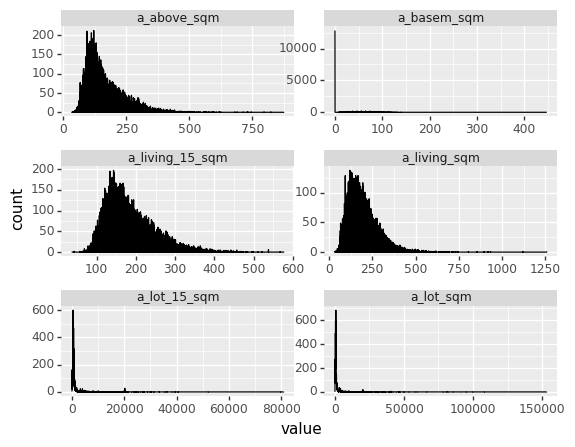

<ggplot: (380821556)>

In [19]:
# Values of area - outliers etc?
df_areas = df_hs.loc[:,ind].melt() ### all area columns melted into long format for easier plotting

p1 = ggplot (df_areas, aes (x = "value")) + \
    geom_freqpoly() + \
    facet_wrap ("variable", ncol = 2, scales = "free") + \
    theme(panel_spacing = 0.3)
ggsave (p1, "./plots/area_histograms.png", dpi = 150)

### Overview of the distributon parameters of areas. Looks reasonable and also interested in lower values
df_hs.loc[:,ind].describe()

del df_areas
del ind
p1

- Data of all area columns looks reasonable

### 3.4 Duplicates?
- For duplicated sells: exclude earlier sell of house

In [20]:
### For duplicated sells: exclude earlier sell of house
### With drop duplicates after sort_values by sale date
df_hs_2 = df_hs.sort_values(by = "date_sold", ascending = False)

df_hs_2.drop_duplicates(subset = "id_house", keep = "first", inplace = True)
df_hs_2.reset_index(inplace = True)

In [21]:
### Save the cleaned data frame for later use
df_hs_2.to_pickle("./data/df_houses_cleaned.pkl")